# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('04-x_train-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('04-x_test-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('04-y_train-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('04-y_test-RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [4]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [5]:
overs = RandomOverSampler()

In [6]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [7]:
y_t_overs

,Emociones
0,3
1,2
2,0
3,3
4,0
...,...
555,2
556,2
557,2
558,2


# **NORMALIZACION DE CARACTERISTICAS**

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [9]:
x_train_std

array([[-0.71908077,  0.26903698, -0.36054445, ..., -0.32827367,
         0.63184885, -0.30157928],
       [-0.68012126, -0.14749615,  0.11988931, ..., -0.65645554,
        -0.75563556, -0.30862314],
       [ 0.83116292, -1.28917699,  1.27984851, ...,  0.93057652,
        -0.04580199,  0.43271178],
       ...,
       [-0.86898451, -0.33120615,  0.08678519, ..., -0.64416979,
         1.38559865, -1.9748012 ],
       [-0.73767849, -0.4997207 ,  0.76153286, ..., -0.19991142,
         0.05806176, -0.99076459],
       [-0.66223509,  0.55213763, -0.43028178, ...,  0.01573908,
         1.06572002, -0.44894802]])

In [10]:
y_t_overs

,Emociones
0,3
1,2
2,0
3,3
4,0
...,...
555,2
556,2
557,2
558,2


# **MODELO DE MARCHINE LEARNING**

In [21]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               11776     
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [22]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
18/18 [==============================] - 1s 3ms/step - loss: 1.1593 - accuracy: 0.4661
Epoch 2/800
18/18 [==============================] - 0s 3ms/step - loss: 0.9109 - accuracy: 0.6232
Epoch 3/800
18/18 [==============================] - 0s 3ms/step - loss: 0.7928 - accuracy: 0.6607
Epoch 4/800
18/18 [==============================] - 0s 3ms/step - loss: 0.7289 - accuracy: 0.7125
Epoch 5/800
18/18 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.7661
Epoch 6/800
18/18 [==============================] - 0s 4ms/step - loss: 0.5684 - accuracy: 0.7821
Epoch 7/800
18/18 [==============================] - 0s 4ms/step - loss: 0.5155 - accuracy: 0.8000
Epoch 8/800
18/18 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.8411
Epoch 9/800
18/18 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.8500
Epoch 10/800
18/18 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8750
Epoch 11/

array([0, 0, 1, 3, 1, 1, 2, 0, 3, 0, 3, 0, 2, 2, 1, 0, 3, 0, 0, 0, 1, 2,
       0, 0, 0, 3, 1, 1, 0, 0, 0, 1, 3, 1, 1, 2, 1, 0, 0, 1, 1, 0, 3, 3,
       0, 1, 1, 1, 3, 0, 3, 0, 0, 1, 3, 3, 0, 3, 1, 3, 3, 2, 3, 3, 3, 1,
       3, 1, 2, 3, 1, 2, 3, 3, 1, 2, 1, 3, 3, 1, 3, 3, 3, 1, 2, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 3, 1, 2, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 2, 3,
       3, 0, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 1])

# **EVALUACION**

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.76      0.68      0.72        38
           2       0.64      0.75      0.69        12
           3       0.73      0.75      0.74        36

    accuracy                           0.76       123
   macro avg       0.74      0.76      0.75       123
weighted avg       0.77      0.76      0.76       123



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.76      0.68      0.72        38
           2       0.64      0.75      0.69        12
           3       0.73      0.75      0.74        36

    accuracy                           0.76       123
   macro avg       0.74      0.76      0.75       123
weighted avg       0.77      0.76      0.76       123

Matriz de confusión, sin normalización
[[32  2  1  2]
 [ 4 26  2  6]
 [ 1  0  9  2]
 [ 1  6  2 27]]


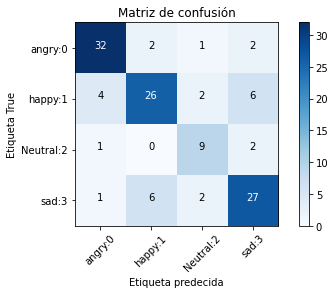

In [28]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')

# **GUARDANDO MODELOS **

Normalizacion

In [29]:
import joblib
joblib.dump(sc , 'Normalizacion_seleccionCaracteristicas.pkl')

['Normalizacion_seleccionCaracteristicas.pkl']

Modelo entrenado

In [30]:
import joblib
joblib.dump(clf , 'Modelo_Prueba173.pkl')

INFO:tensorflow:Assets written to: ram://2170ebf8-5c08-4109-a519-84f7360acec9/assets


['Modelo_Prueba173.pkl']